# DS 2023 HW 11

## Instructions

Follow the prompts in this notebook.

Make use of code provided.

Respond with code to generate your answers.
|
If asked to provide a specific response, create a Markdown cell after your code cell(s) with the response.

NOTE: To save as a PDF, first export your notebook to HTML, open it in a brower, and the print the web page to PDF.

**10 Points**

## Student Info

Write your name and computer ID below.

- NAME: Sae-Jin Moon
- ID: rhn9qs

## Compliance with Homework Submission Guidelines

1 pt

## Overview

In this homework assignment, you will use real climate data provided by the U.S. National Oceanic and Atmospheric Association. In brief, it describes global temperature changes from December 1854 to the present relative to a reference point.

You will use these data to create visualizaitons that distort the data in some way to make a point. 

### About the Data Set

**Global Land and Ocean 60-Month Period Average Temperature Anomalies**

Fromr 1845-2025 | Degrees Celsius

Global temperature anomaly data come from NOAA's Global Surface Temperature Analysis data set ([NOAAGlobalTemp](https://www.ncei.noaa.gov/products/land-based-station/noaa-global-temp)).

This data set may be used as a global-scale climate diagnostic tool to provide an overview of average global temperatures compared to a reference value (see below).

NOAAGlobalTemp uses comprehensive data collections of increased global coverage over land (Global Historical Climatology Network-Monthly) and ocean (Extended Reconstructed Sea Surface Temperature) surfaces. 

These datasets have data from 1850 to the present. 

The land and ocean datasets are blended into a single product to produce the combined global land and ocean temperature anomalies. 

**About temperature anomalies** 

A temperature anomaly is a departure from a reference value, e.g. a long-term average. A positive anomaly indicates that the observed temperature was warmer than the reference value, while a negative anomaly indicates that the observed temperature was cooler than the reference value. The global and hemispheric temperature anomalies in this data set are computed relative to the 1901-2000 average.


**References**

1. [An Overview of the Global Historical Climatology Network Temperature Database](https://www.ncei.noaa.gov/monitoring-content/monitoring-references/docs/peterson-vose-1997.pdf)
2. https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series 

## Setting Up

Import the data set attached to this assignment in Canvas.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("global-anomalies-1850-2025.csv")
df.columns = [col.lower() for col in df.columns]
df['date'] = pd.to_datetime(df['date'].astype(str).str[:4] + "/" + df['date'].astype(str).str[4:], format="%Y/%m")
df = df.set_index('date')
df.head()

,anomaly
date,
1854-12-01,-0.08
1855-01-01,-0.07
1855-02-01,-0.07
1855-03-01,-0.06
1855-04-01,-0.06


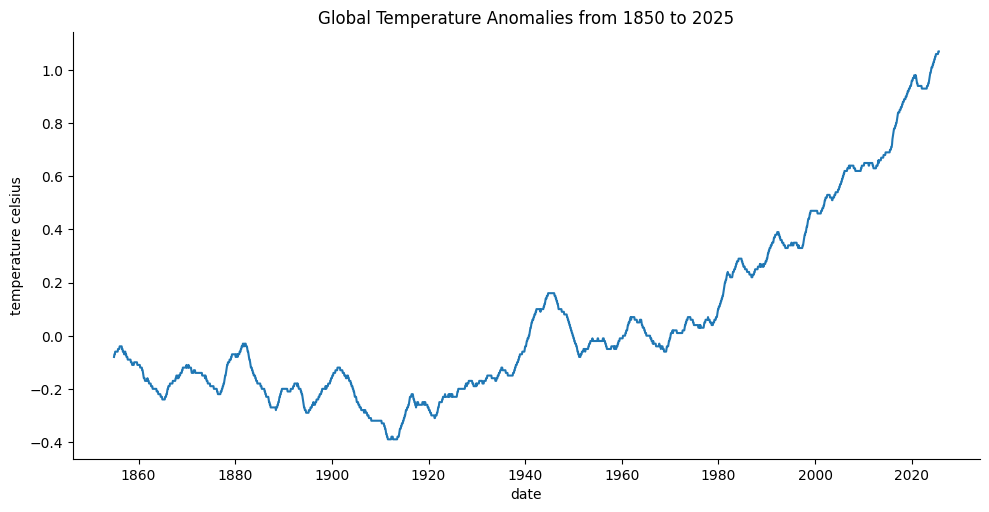

In [24]:
sns.relplot(df, kind='line', x='date', y='anomaly', aspect=2)
plt.ylabel("temperature celsius")
plt.title("Global Temperature Anomalies from 1850 to 2025")
plt.show()

# Tasks

## Task 1

1 pt

Create a copy of `df` that includes only dates between June 2020 and February 2022.

Print the minimum and maximum values of the new data frame.

In [3]:
df_subset = df.loc['2020-06':'2022-02'].copy()
min_val = df_subset['anomaly'].min()
max_val = df_subset['anomaly'].max()
print(f"minimum value: {min_val}")
print(f"maximum value: {max_val}")

minimum value: 0.93
maximum value: 0.98


## Task 2

1 pt


Use Seaborn's `relplot` to create a line plot of this subset that emphasizes the downward trend.

Do this by restricting the span of the y-axis to minumum values from the previous task.

Also, make the image taller than it is wide to exaggerate the direction of the line.

Keep the y-axis label the same as the previous plot.

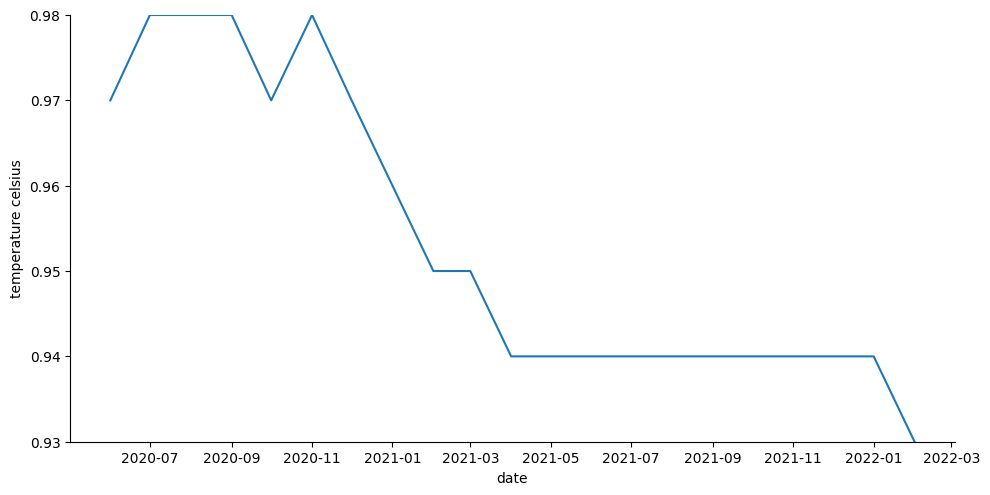

In [23]:
g = sns.relplot(df_subset, kind='line', x='date', y='anomaly', aspect=2)
g.set(ylim=(min_val, max_val))
g.set_ylabels("temperature celsius")
plt.show()

## Task 3

2 pt

Annotate the plot with text that reads "Global warming stops here" and an arrow that points to the point in the plot at which the temperates fall without rising again, i.e. November 2020.

Hint: To do this, use the `ax.annotation()`.

Also, use `pd.Timestamp('2020-11')` to get the x axis position for your annotation's `xy` argument, and nudge the text to the right by adding `pd.Timedelta(days=30)` in the `xytext` argument.

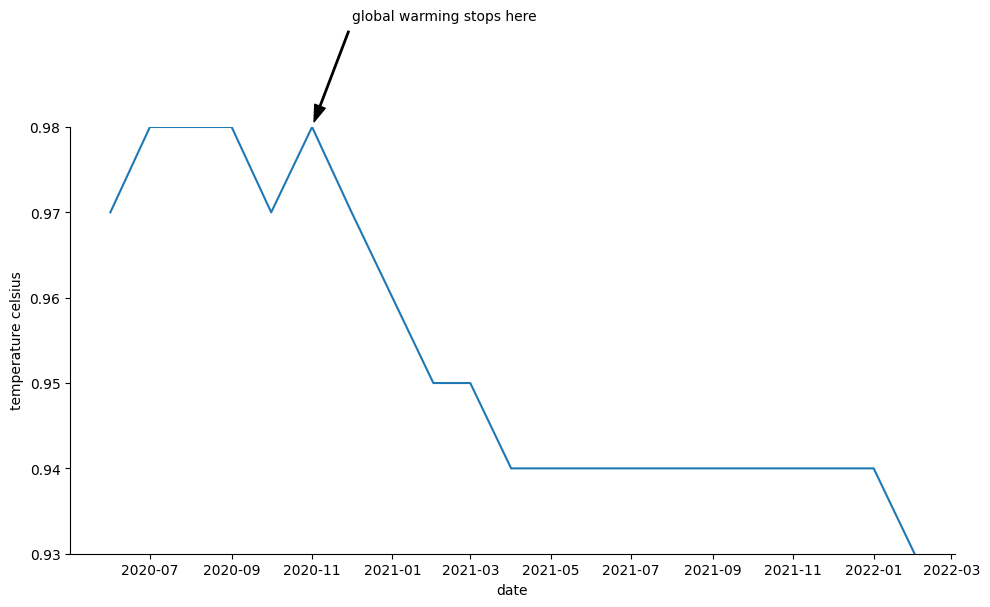

In [22]:
g = sns.relplot(df_subset, kind='line', x='date', y='anomaly', aspect=2)
g.set(ylim=(min_val, max_val))
g.set_ylabels("temperature celsius")

ax = g.ax
x_point = pd.Timestamp('2020-11')
y_point = df_subset.loc[x_point]['anomaly']

ax.annotate(
    "global warming stops here",
    xy=(x_point, y_point),
    xytext=(x_point + pd.Timedelta(days=30), y_point + 0.0125),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    horizontalalignment='left'
)
plt.show()

## Task 4

1 pt

Go back to `df` and show the plot in an exaggerated manner by using a height of $10$ and an aspect of $.75$.

Label the y-axis as before.

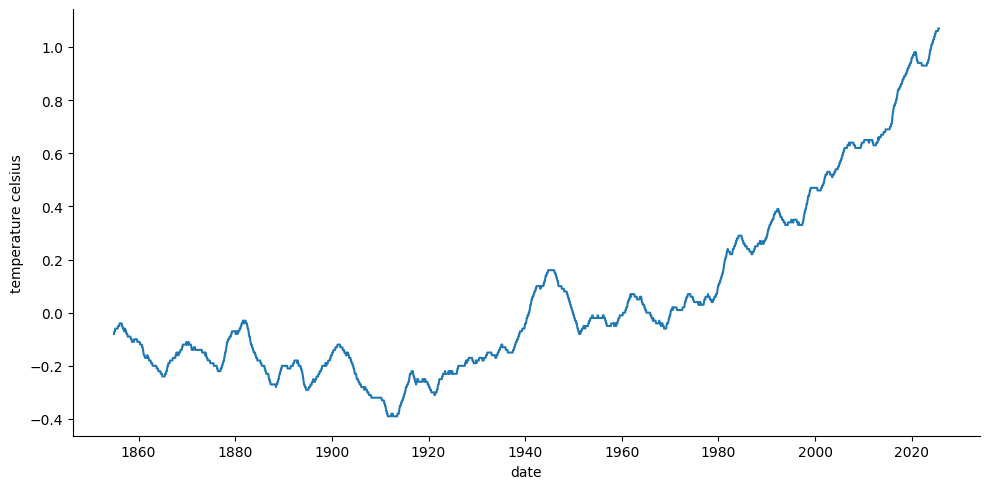

In [21]:
g = sns.relplot(df, kind='line', x='date', y='anomaly', aspect=2)
g.set_ylabels("temperature celsius")
plt.show()

## Task 5

2 points

Create another line plot with `df`, this time setting the height to $5$ and the 
aspect to $2$.

Keep the y axis label.

Add an annotion with an arrow that points to the first data point that alerts the reader that this is when "Effective weather data collection begins".

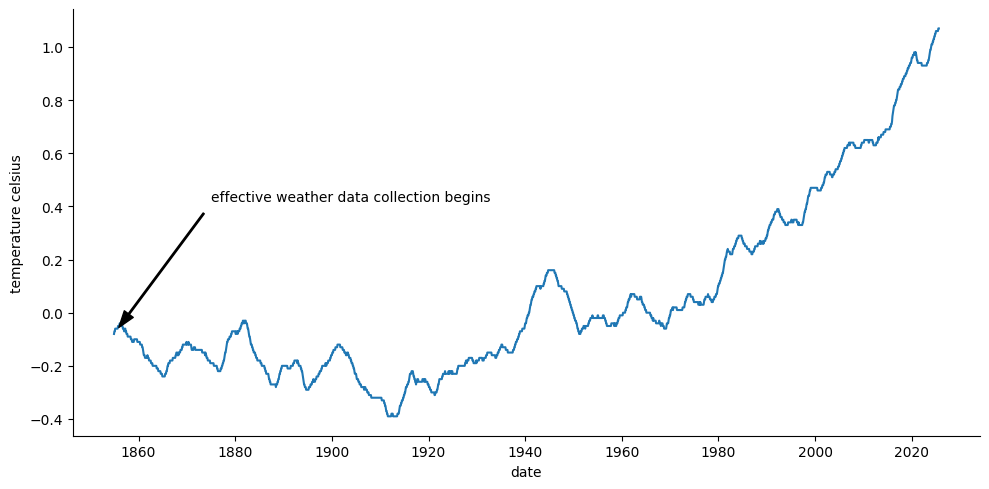

In [20]:
g = sns.relplot(df, kind='line', x='date', y='anomaly', height=5, aspect=2)
g.set_ylabels("temperature celsius")

ax = g.ax
first_date = df.index.min()
first_anomaly = df.iloc[0]['anomaly']

ax.annotate(
    "effective weather data collection begins",
    xy=(first_date, first_anomaly),
    xytext=(first_date + pd.Timedelta(days=365*20), first_anomaly + 0.5),
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
)
plt.show()

## Task 6

2 points

Create another line plot from `df` with the same height, aspect, and y label as the previous graph.

In the plot, create a dotted red horizontal line using the value of `right_whisker`, computed below, as the y-axis value.

Note this value corresponds to the right whisker of a box plot, so the data points above the line are outliers. 

Copy this picture into a graphic editor of choice (Google Slides will do) and create an infographic that contains a catchy title and a description of what the line means. 

When you are done, save the graphic as an image file and show it in a markdown cell in this notebook.

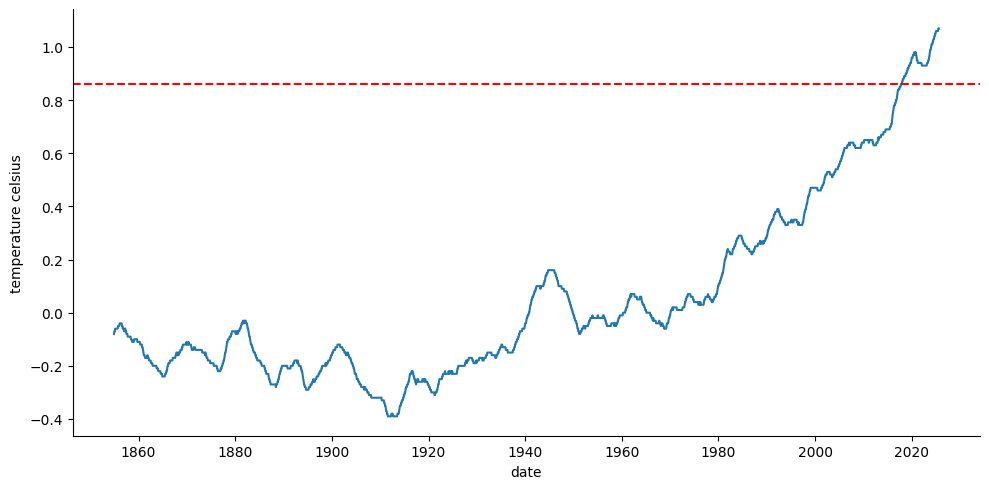

In [19]:
q1 = df['anomaly'].quantile(0.25)
q3 = df['anomaly'].quantile(0.75)
iqr = q3 - q1

upper_whisker = q3 + 1.5 * iqr

right_whisker = df['anomaly'][df['anomaly'] <= upper_whisker].max()

g = sns.relplot(df, kind='line', x='date', y='anomaly', height=5, aspect=2)
g.set_ylabels("temperature celsius")
g.ax.axhline(right_whisker, ls='--', color='red')
plt.show()

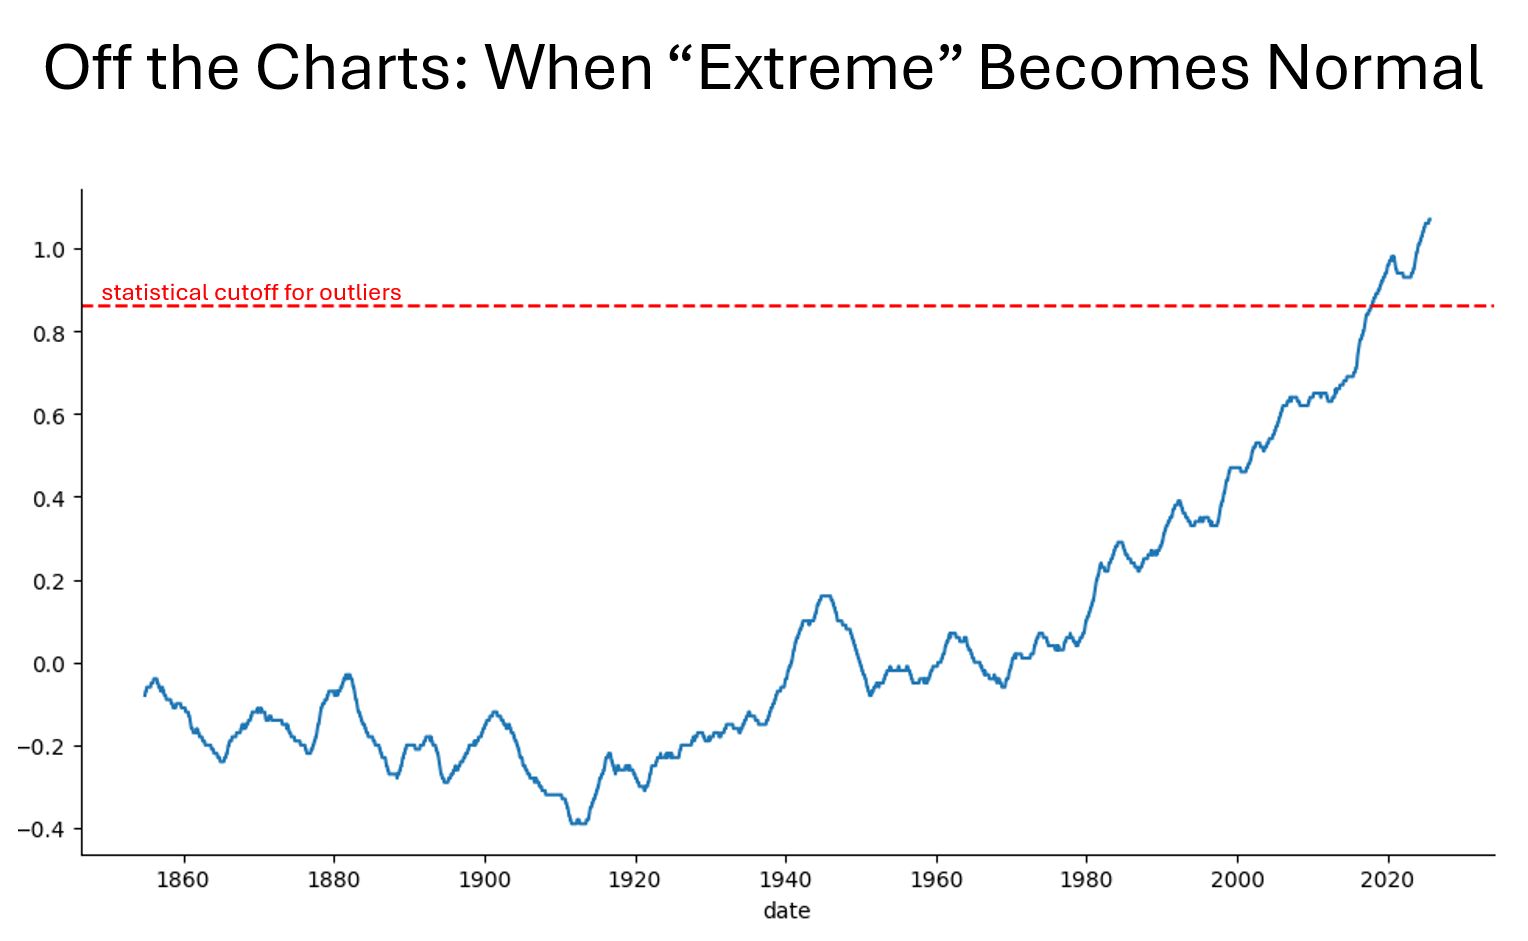